<a href="https://colab.research.google.com/github/DanielMA21/Proyecto-Deep-Learning/blob/main/Tarea_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predicción de pasajeros de aerolíneas
### Objetivo: Predecir el número de pasajeros futuros

Bases de datos Pasajeros aéreos:
 https://www.kaggle.com/datasets/rakannimer/air-passengers

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
#cargar datos
data=pd.read_csv('/AirPassengers.csv',parse_dates=['Month'],index_col='Month')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("---primeras 5 filas del dataset---")
print(data.head())

---primeras 5 filas del dataset---
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [ ]:
print(data.describe())

       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000


In [ ]:
print(data.describe())

       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000


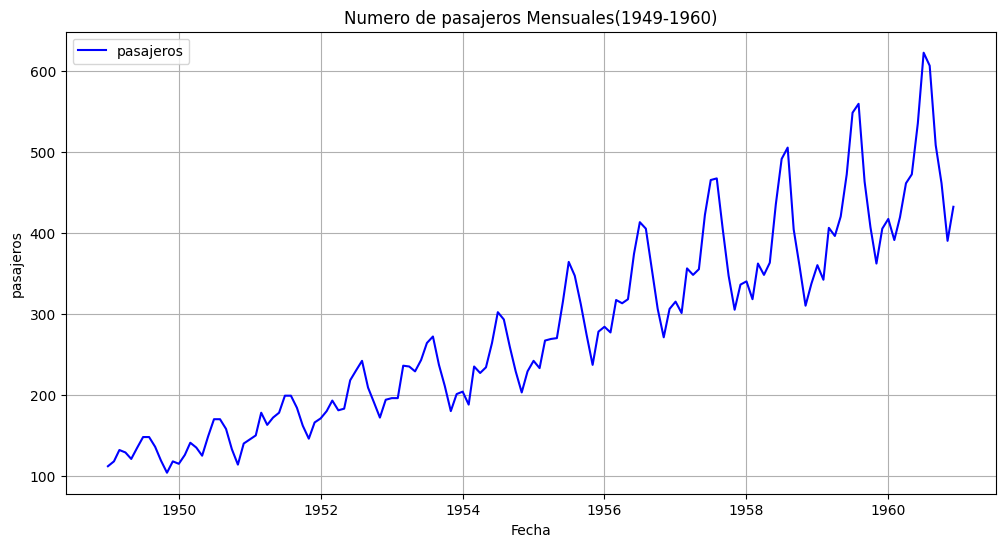

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(data.index, data['#Passengers'], label='pasajeros',color='blue')
plt.title('Numero de pasajeros Mensuales(1949-1960)')
plt.xlabel('Fecha')
plt.ylabel('pasajeros')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Prepocesamiento de Datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. Cargar datos
data = pd.read_csv('/AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# 2. Normalizar datos
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 3. Función para crear secuencias (¡INDENTACIÓN CORRECTA!)
def create_sequences(data, n_steps=3):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# 4. Generar secuencias
X, y = create_sequences(data_scaled)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]


In [ ]:
#Creacion del Modelo RNN/LSTM
#Para series de tiempo (LSTM)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

#Modelo
model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(12,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - loss: 0.1002 - val_loss: 0.4190
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0937 - val_loss: 0.3815
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0797 - val_loss: 0.3457
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0722 - val_loss: 0.3105
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0580 - val_loss: 0.2770
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0501 - val_loss: 0.2447
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0425 - val_loss: 0.2132
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0341 - val_loss: 0.1821
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0282 - val_loss: 0.1524
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0265 - val_loss: 0.1242
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0206 - val_loss: 0.0995
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0186 - val_l

### Optimizador adam: Es adaptativo (ajusta tasas de aprendizaje por parámetro).


In [ ]:
#Entrenamiento y evaluación
# Para series de tiempo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
MSE: 0.0173, MAE: 0.1121


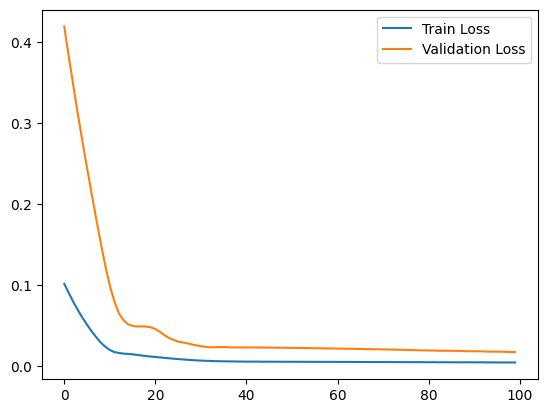

In [ ]:
#Grafico de funcion de pérdida
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# 8. Predicción futura (1961)
last_sequence = data_scaled[-12:]  # Últimos 12 meses conocidos
future_predictions = []
for _ in range(12):
    next_pred = model.predict(last_sequence.reshape(1, 12, 1))
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[1:], next_pred)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
print("Predicciones para 1961:\n", future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicciones para 1961:
 [[   -7142.4546]
 [  -12113.467 ]
 [  -20770.582 ]
 [  -35922.77  ]
 [  -61052.117 ]
 [ -107336.664 ]
 [ -189441.47  ]
 [ -321213.16  ]
 [ -478821.25  ]
 [ -753837.56  ]
 [-1381344.9   ]
 [-2447657.8   ]]


### Proyecto2: Aplicación de Filtros y clasificación de Imágenes
Proposito :Reducir el ruido y suavizar la imagen

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense

Link base de datos:  https://www.cs.toronto.edu/~kriz/cifar.html

In [27]:
#Cargar los datos
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
class_names=['avion','auto','pájaro','gato','venado','perro','rana','caballo','barco','camión']


In [28]:
#Aplicar filtros a una imagen
def apply_filters(image):
  #Filtro Gaussiano (suavizado)
  gaussian=cv2.GaussianBlur(image,(5,5),0)

  #Filtro canny (deteccion de bordes)
  gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
  canny=cv2.Canny(gray,100,200)
  return gaussian,canny

sample_image=X_train[0]
gaussian,canny =apply_filters(sample_image)


In [29]:
#Creamos una carpeta
import os
os.makedirs('images',exist_ok=True)

In [30]:
#Verificamos ruta
print(os.path.abspath('images'))

/content/images


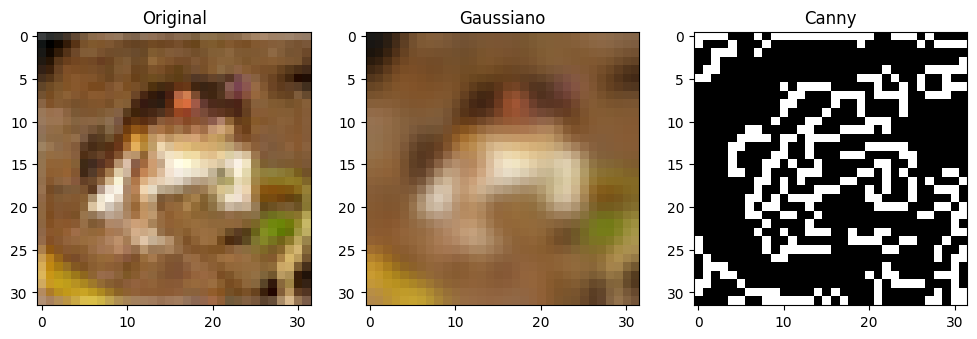

In [31]:
#Visualizar resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(sample_image)
plt.subplot(1, 3, 2)
plt.title("Gaussiano")
plt.imshow(gaussian)
plt.subplot(1, 3, 3)
plt.title("Canny")
plt.imshow(canny, cmap='gray')
plt.savefig('images/filtros_comparacion.png')
plt.show()

In [32]:
# Preprocesamiento para clasificación
X_train=X_train/255.0
X_test=X_test/255.0

In [33]:
# Modelo CNN para clasificación
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.3808 - loss: 1.6953 - val_accuracy: 0.5583 - val_loss: 1.2458
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.5943 - loss: 1.1508 - val_accuracy: 0.6439 - val_loss: 1.0298
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.6520 - loss: 1.0014 - val_accuracy: 0.6411 - val_loss: 1.0318
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.6825 - loss: 0.9091 - val_accuracy: 0.6669 - val_loss: 0.9640
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7085 - loss: 0.8462 - val_accuracy: 0.6766 - val_loss: 0.9484
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.7323 - loss: 0.7770 - val_accuracy: 0.6816 - val_loss: 0.9288
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7484 - loss: 0.7289 - val_accuracy: 0.6879 - val_loss: 0.9223
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7694 -

In [34]:
#Evaluamos el modelo
test_loss,test_acc =model.evaluate(X_test,y_test,verbose=2)
print(f"\nPrecisión en test:{test_acc:2%}")

313/313 - 4s - 12ms/step - accuracy: 0.6826 - loss: 0.9976

Precisión en test:68.260002%


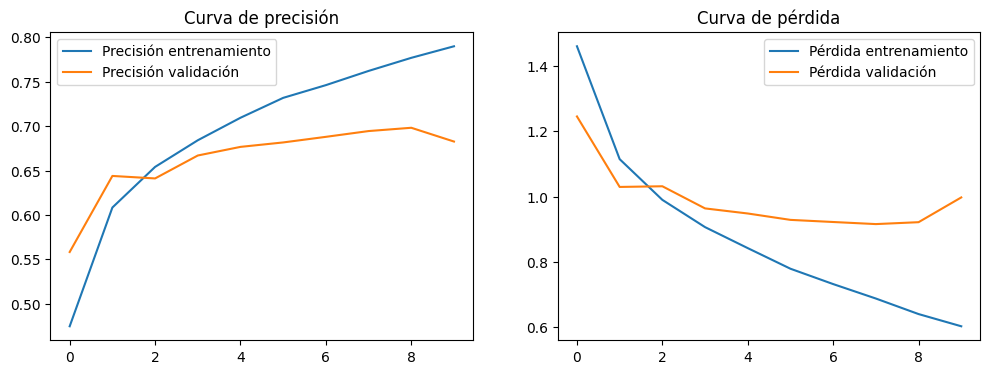

In [35]:
# 7. Gráficos de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Curva de precisión')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Curva de pérdida')
plt.legend()
plt.savefig('images/curvas_entrenamiento.png')
plt.show()